In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


The IPL dataset gives the data of different teams playing against each other of different sessons of IPL in different cities and date. It gives data of the teams which played against each other , the winning team , the toss decisions , umpires of the match etc.


# Matches dataset

In [2]:
url='https://raw.githubusercontent.com/12345k/IPL-Dataset/master/IPL/data.csv'
ipl=pd.read_csv(url)
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [3]:
ipl.drop('umpire3',axis=1,inplace=True)

## Print team with most matches won


In [4]:
ipl['winner'].value_counts().idxmax()

'Mumbai Indians'

## Print team with most tosses won

In [5]:
ipl['toss_winner'].value_counts().idxmax()

'Mumbai Indians'




## Print season when most matches were played

In [6]:
ipl['season'].value_counts().idxmax()

2013

## Print player with most man of the match awards

In [7]:
ipl['player_of_match'].value_counts().idxmax()

'CH Gayle'

## Print team with most matches won at home


In [8]:
ipl.loc[ipl['winner']==ipl['team2']]['winner'].value_counts().idxmax()

'Royal Challengers Bangalore'

## No. of matches won while batting first 


In [9]:
ipl.loc[(ipl['winner']==ipl['toss_winner'])&(ipl['toss_decision']=='bat')].shape[0]

118

## No. of matches won while chasing 

In [10]:
ipl.loc[(ipl['winner']==ipl['toss_winner'])&(ipl['toss_decision']=='field')].shape[0]

173

## Person who has been the main umpire most no of times

In [11]:
ipl['umpire1'].value_counts().idxmax()

'HDPK Dharmasena'

## Person who has been the second umpire most no of times

In [12]:
ipl['umpire2'].value_counts().idxmax()

'SJA Taufel'

## Check stats between two teams

In [13]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"

        
team1 = input()
team3 = team_name(team1)
team2 = input()
team4 = team_name(team2)
ipl.loc[((ipl['team1']==team3)&(ipl['team2']==team4))| ((ipl['team1']==team4)&(ipl['team2']==team3))]

CSK
RCB


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
14,15,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin
47,48,2008,Chennai,2008-05-21,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,14,0,A Kumble,"MA Chidambaram Stadium, Chepauk",DJ Harper,I Shivram
62,63,2009,Port Elizabeth,2009-04-20,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel
99,100,2009,Durban,2009-05-14,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Royal Challengers Bangalore,0,2,LRPL Taylor,Kingsmead,BR Doctrove,DJ Harper
113,114,2009,Johannesburg,2009-05-23,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,MK Pandey,New Wanderers Stadium,RE Koertzen,SJA Taufel
132,133,2010,Bangalore,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin
142,143,2010,Chennai,2010-03-31,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk",BG Jerling,RE Koertzen
188,189,2011,Chennai,2011-04-16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,AL Hill
242,243,2011,Bangalore,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen
244,245,2011,Mumbai,2011-05-24,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SK Raina,Wankhede Stadium,Asad Rauf,SJA Taufel


# Batsmen Dataset

In [6]:
bats=pd.read_csv('batting.qz.txt',sep='\t')
bats.columns

Index(['POS', 'PLAYER', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s', 'Team'],
      dtype='object')

In [4]:
a=bats.columns[1:]
bats.drop('Team',axis=1,inplace=True)

In [5]:
bats.columns=a
bats.head(20)

,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
0,Virat Kohli,177.0,169.0,26.0,5412.0,113,37.84,"4,112",131.61,5.0,36.0,480.0,190.0,Royal Challengers Bangalore
1,Suresh Raina,193.0,189.0,28.0,5368.0,100*,33.34,"3,914",137.14,1.0,38.0,493.0,194.0,Chennai Super Kings
2,Rohit Sharma,188.0,183.0,28.0,4898.0,109*,31.60,"3,744",130.82,1.0,36.0,431.0,194.0,Mumbai Indians
3,David Warner,126.0,126.0,17.0,4706.0,126,43.17,"3,305",142.39,4.0,44.0,458.0,181.0,Sunrisers Hyderabad
4,Shikhar Dhawan,159.0,158.0,21.0,4579.0,97*,33.42,"3,669",124.80,0.0,37.0,524.0,96.0,Delhi Capitals
5,Chris Gayle,125.0,124.0,15.0,4484.0,175*,41.13,"2,969",151.02,6.0,28.0,369.0,326.0,Kings XI Punjab
6,MS Dhoni,190.0,170.0,65.0,4432.0,84*,42.20,"3,215",137.85,0.0,23.0,297.0,209.0,Chennai Super Kings
7,Robin Uthappa,177.0,170.0,17.0,4411.0,87,28.83,"3,380",130.50,0.0,24.0,435.0,156.0,Rajasthan Royals
8,AB de Villiers,154.0,142.0,32.0,4395.0,133*,39.95,"2,906",151.23,3.0,33.0,357.0,212.0,Royal Challengers Bangalore
9,Gautam Gambhir,154.0,152.0,17.0,4217.0,93,31.23,"3,404",123.88,0.0,36.0,491.0,59.0,Delhi Capitals


## Getting stats of batsmen teamwise

In [17]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"

        
team1 = input()
team2 = team_name(team1)
bats.groupby('Team').get_group(team2)

CSK


,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Team
1,Suresh Raina,193.0,189.0,28.0,5368.0,100*,33.34,"3,914",137.14,1.0,38.0,493.0,194.0,Chennai Super Kings
6,MS Dhoni,190.0,170.0,65.0,4432.0,84*,42.20,"3,215",137.85,0.0,23.0,297.0,209.0,Chennai Super Kings
12,Shane Watson,134.0,130.0,15.0,3575.0,117*,31.08,"2,562",139.53,4.0,19.0,343.0,177.0,Chennai Super Kings
13,Ambati Rayudu,147.0,140.0,25.0,3300.0,100*,28.69,"2,620",125.95,1.0,18.0,278.0,120.0,Chennai Super Kings
21,Murali Vijay,103.0,103.0,5.0,2587.0,127,26.39,"2,106",122.83,2.0,13.0,243.0,91.0,Chennai Super Kings
32,Michael Hussey,59.0,58.0,7.0,1977.0,116*,38.76,"1,612",122.64,1.0,15.0,198.0,52.0,Chennai Super Kings
33,Ravindra Jadej,170.0,128.0,48.0,1927.0,48,24.08,"1,572",122.58,0.0,0.0,135.0,65.0,Chennai Super Kings
34,Faf du Plessis,71.0,64.0,5.0,1853.0,96,31.40,"1,462",126.74,0.0,12.0,163.0,59.0,Chennai Super Kings
46,Dwayne Bravo,134.0,102.0,38.0,1483.0,70*,23.17,"1,156",128.28,0.0,5.0,116.0,61.0,Chennai Super Kings
55,David Hussey,64.0,61.0,12.0,1322.0,71,26.97,"1,075",122.97,0.0,5.0,90.0,60.0,Chennai Super Kings


## The player with maximum Fours amongst top run getters

In [18]:
bats[bats['4s']==max(bats['4s'])][['PLAYER','4s']]

,PLAYER,4s
4,Shikhar Dhawan,524.0


## The player with maximum Sixes amongst top run getters

In [19]:
bats[bats['6s']==max(bats['6s'])][['PLAYER','6s']]

,PLAYER,6s
5,Chris Gayle,326.0


## The player with best average amonst top run getters

In [20]:
bats[bats['Avg']==max(bats['Avg'])][['PLAYER','Avg']]

,PLAYER,Avg
3,David Warner,43.17


## The player with best Strike-rate amonst top run getters

In [22]:
bats[bats['SR']==max(bats['SR'])][['PLAYER','SR']]

,PLAYER,SR
51,Andre Russell,186.41


## The player with most balls faced amonst top run getters

In [23]:
def changex(a,df):
    b=[]
    for i in df[a]:
        if type(i)==float or len(i.split(','))==1:
            b.append(i) 
        else:
            if len(i.split(','))==2:
                x=i.split(',')[0]
                y=i.split(',')[1]
                b.append(str(x)+str(y))
    df[a]=b
    return
changex('BF',bats)
bats['BF']=bats['BF'].astype(float)
bats[bats['BF']==max(bats['BF'])][['PLAYER','BF']]

,PLAYER,BF
0,Virat Kohli,4112.0


## The player with highest score amonst top run getters

In [24]:
def changex(a,df):
    b=[]
    for i in df[a]:
        if type(i)==float or i.endswith('*')==False:
            b.append(i) 
        else:
            if i.endswith('*'):
                i=i+')'
                x=i.split('*')[0]
                y='.1'
                b.append(str(x)+str(y))
    df[a]=b
    return
changex('HS',bats)
bats['HS']=bats['HS'].astype(float)
bats[bats['HS']==max(bats['HS'])][['PLAYER','HS']]


,PLAYER,HS
5,Chris Gayle,175.1


## player who has played most matches amongst top run getters

In [25]:
bats[bats['Mat']==max(bats['Mat'])][['PLAYER','Mat']]

,PLAYER,Mat
1,Suresh Raina,193.0


## player who has played most innings amongst top run getters

In [26]:
bats[bats['Inns']==max(bats['Inns'])][['PLAYER','Inns']]

,PLAYER,Inns
1,Suresh Raina,189.0


## player who has worst average amongst top run getters

In [27]:
bats[bats['Avg']==min(bats['Avg'])][['PLAYER','Avg']]

,PLAYER,Avg
60,Mayank Agarwal,18.34


## player who has worst strike rate amongst top run getters

In [28]:
bats[bats['SR']==min(bats['SR'])][['PLAYER','SR']]

,PLAYER,SR
54,Sourav Ganguly,106.8


## Player with maximum boundaries amongst top run getters

In [29]:
bats[(bats['4s']+bats['6s'])==max((bats['4s']+bats['6s']))][['PLAYER','4s','6s']]

,PLAYER,4s,6s
5,Chris Gayle,369.0,326.0


## General Statistics

In [30]:
bats.describe(include='float')

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,96.000000,88.783784,15.621622,2218.297297,94.843243,30.284189,1691.486486,131.446757,0.702703,13.094595,207.054054,82.797297
std,43.888714,41.036993,12.078173,1208.325998,21.330800,5.901203,899.989273,12.948725,1.213280,9.728040,121.096915,57.464695
min,29.000000,29.000000,2.000000,969.000000,48.000000,18.340000,686.000000,106.800000,0.000000,0.000000,61.000000,24.000000
25%,64.250000,58.750000,6.250000,1328.750000,81.025000,26.330000,992.750000,123.040000,0.000000,6.250000,118.000000,44.000000
50%,82.000000,77.000000,14.500000,1783.500000,94.050000,28.775000,1411.500000,129.755000,0.000000,11.000000,160.500000,61.000000
75%,129.000000,123.000000,22.500000,2753.750000,104.600000,34.107500,2169.500000,137.417500,1.000000,15.750000,268.250000,95.500000
max,193.000000,189.000000,65.000000,5412.000000,175.100000,43.170000,4112.000000,186.410000,6.000000,44.000000,524.000000,326.000000


# Visualization

# how many matches played in each ground until now

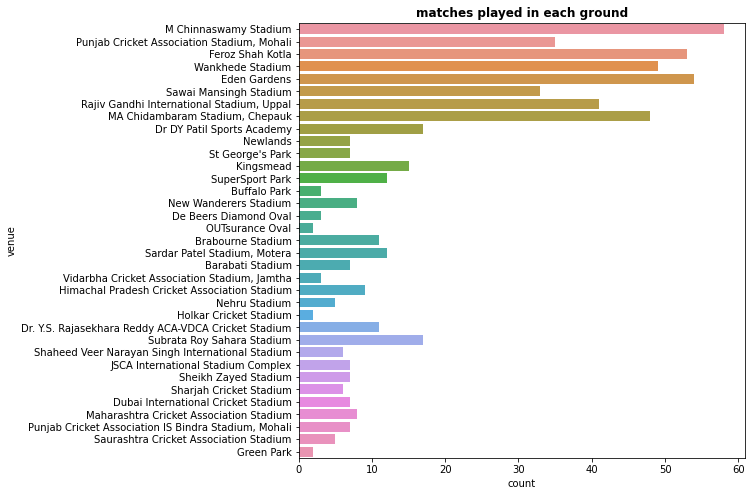

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(y = ipl['venue'],data = ipl)
plt.title("matches played in each ground",fontweight='bold')
plt.show()

### conclusion: we can analyse the number of matches played at each ground where in "M chinnaswamy stadium" the most matches are played and in "Green Park" the least 

# how many matches played in each ground on a respective year

enter the year2010


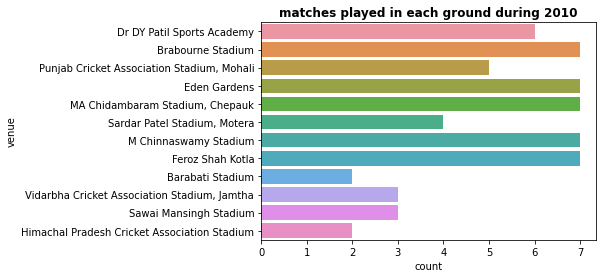

In [24]:
year = int(input("enter the year"))
df = ipl.loc[ipl['season']==year]
x="matches played in each ground during "+str(year)
plt.title('{}'.format(x),fontweight='bold')
sns.countplot(y = df['venue'])
plt.show()

### conclusion: From the above you can analyse the number of matched played at a particular stadium with the given year as input

## total match won by teams on a specified year

enter the year2010


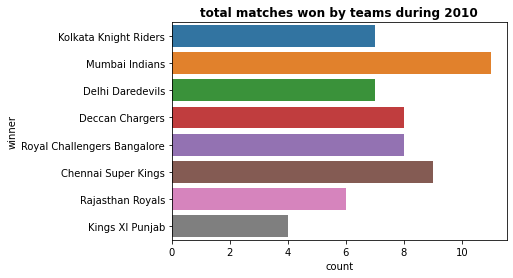

In [25]:
year = int(input("enter the year"))
df = ipl.loc[ipl['season']==year]
x="total matches won by teams during "+str(year)
plt.title('{}'.format(x),fontweight='bold')
sns.countplot(y = df['winner'])
plt.show()

### conclusion: You can provide the input year and analyse the total number of matches won by the team during that year. This type of analysis will be useful for investors so that in future they will have a clear idea of which team is to be supported 

# given two teams the win record b/w each other

RCB
CSK


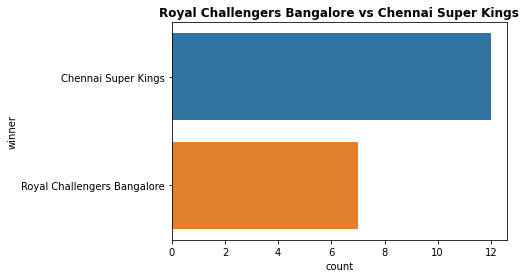

In [26]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"

        
team1 = input()
team1 = team_name(team1)
team2 = input()
team2 = team_name(team2)
df = ipl.loc[((ipl['team1']==team1)&(ipl['team2']==team2))| ((ipl['team1']==team2)&(ipl['team2']==team1))]
sns.countplot(y = df['winner'])
x= str(team1)+" vs "+str(team2)
plt.title('{}'.format(x),fontweight='bold')
plt.show()

### conclusion: This can be used to predict which team will win the match on before hand by the data we have by just entering the input as the two teams names

# The most successful IPL Team

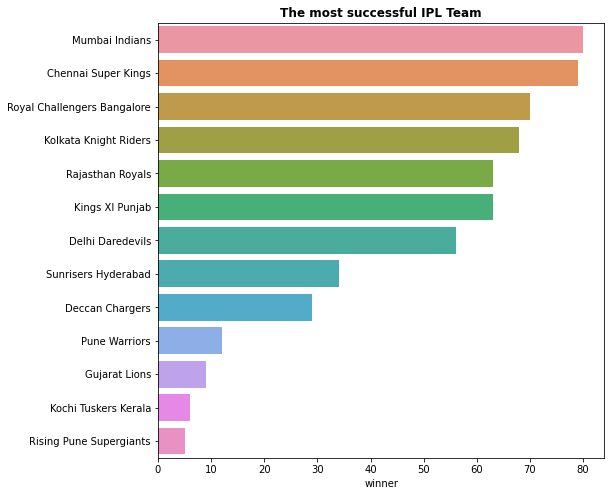

In [35]:
plt.figure(figsize=(8,8))
data = ipl.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.title("The most successful IPL Team",fontweight='bold')
plt.show()

### conclusion : this gives the most succesful ipl team which is "Mumbai indians" and the least succesful being "Rising Pune Supergiants"

# how many time each team won a toss and selected bating

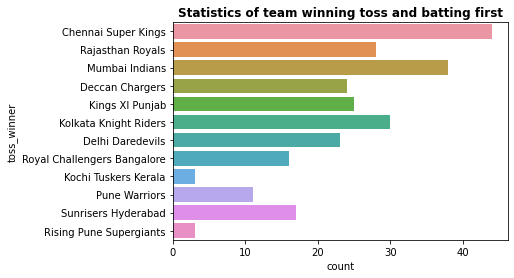

In [36]:
df = ipl.loc[ipl['toss_decision']=='bat']
sns.countplot(y = df['toss_winner'])
plt.title("Statistics of team winning toss and batting first",fontweight='bold')
plt.show()

### conclusion : It shows the scenario where the team selected batting after they won the toss. this graph presents that CSK has majoritly chosen batting after winning a toss and Rising Pune Supergaints have selected it least 

# how many times each team won a toss ,selected to batting and won the match

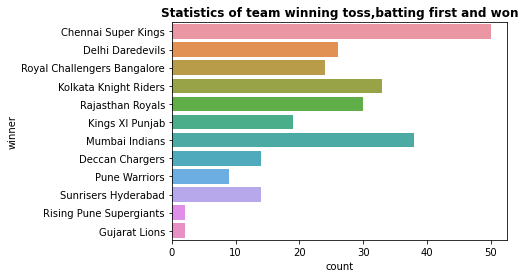

In [37]:
df = ipl.loc[ipl['toss_decision']=='bat']
sns.countplot(y = df['winner'])
plt.title("Statistics of team winning toss,batting first and won",fontweight='bold')
plt.show()

# In which city does Weather affect matches?

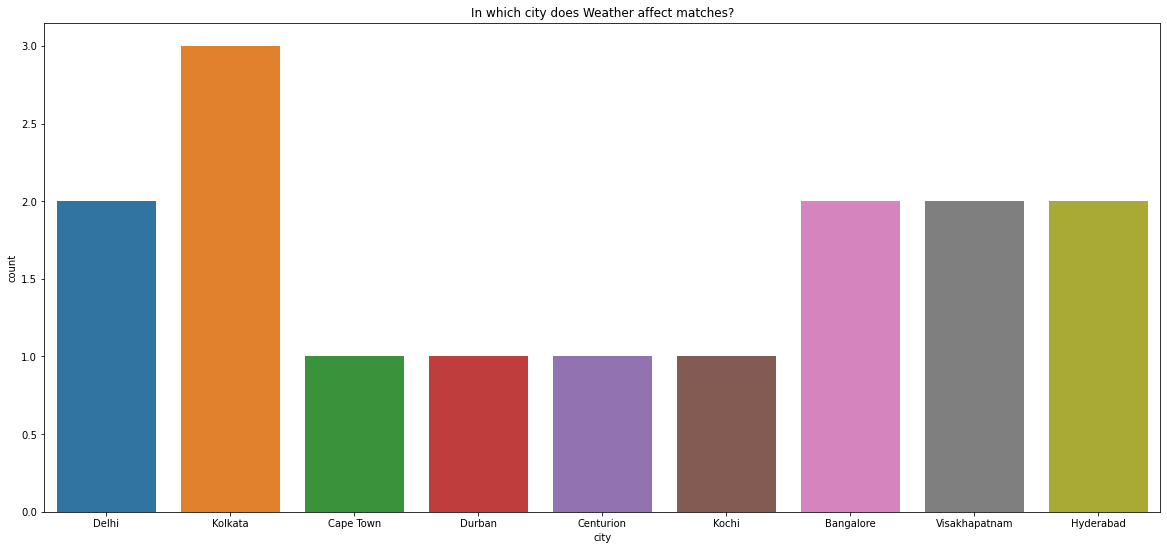

In [38]:
plt.figure(figsize=(20,9))
sns.countplot(ipl.city[ipl.dl_applied==1])
plt.title('In which city does Weather affect matches?')
plt.show()

### Role of toss

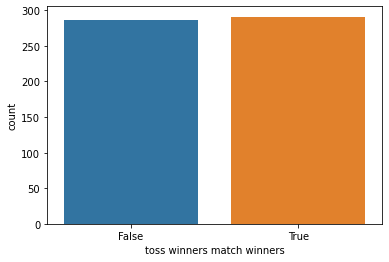

In [40]:
ss = ipl['toss_winner'] == ipl['winner']
sns.countplot(ss)
plt.xlabel('toss winners match winners')
plt.show()

### conclusion: This graph depicts the number of times a team won a match after it won the toss as true an false otherwise 

# team which won in the different cities at diffetent seasons

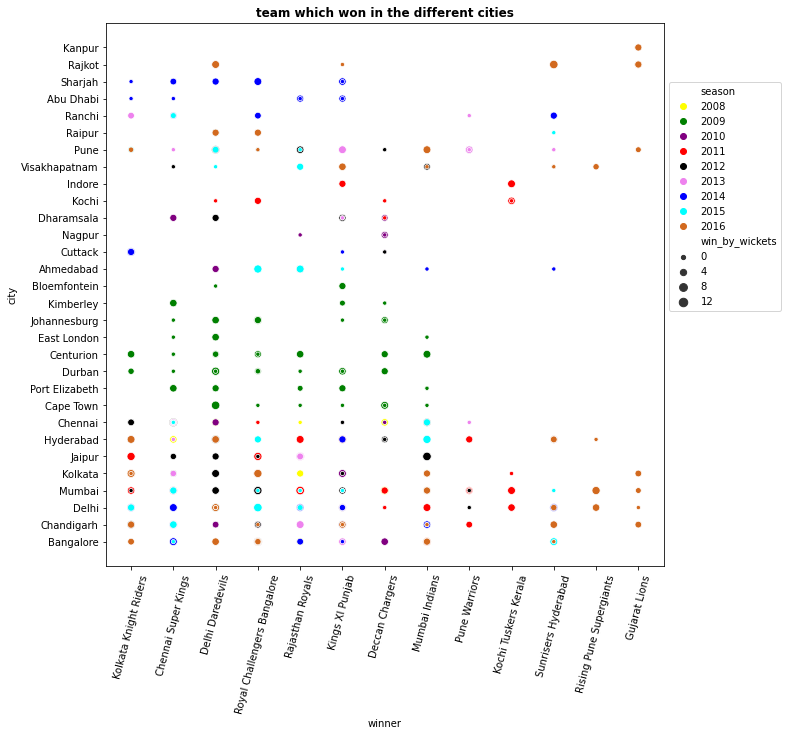

In [41]:
plt.figure(figsize = [10,10])
sns.scatterplot(x = ipl['winner'],y = ipl['city'],data = ipl,hue = ipl['season'],size=ipl['win_by_wickets'],palette = {2008:'yellow',2009:'green',2010:'purple',2011:'red',2012:'black',2013:'violet',2014:'blue',2015:'cyan',2016:'chocolate',2017:'orange'})
plt.legend(bbox_to_anchor=[1.0,0.9])
plt.xticks(rotation = 75)
plt.title('team which won in the different cities',fontweight='bold' )
plt.show()

### conclusion: It gives the stats about the different teams denoted in x axis , which won in different cities with is depicted through y -axis , and at different seasons which is depicted by the color of the dot and wins by wicket is depicted by the size of the dot 

## Total statistical comparison of matches won all-time

enter the team name CSK


Text(0.5, 1.0, 'matches won by Chennai Super Kings in each year')

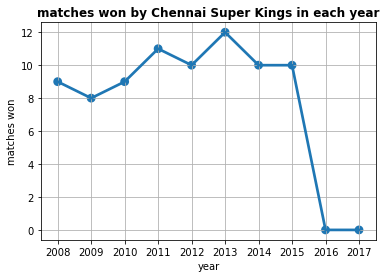

In [42]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"


team = input("enter the team name ")
team = team_name(team)
counts = []
year = []
for i in range(2008,2018):
    df = ipl.loc[(ipl['season']==i) & (ipl['winner']==str(team))]
    year.append(i)
    counts.append(len(df))
sns.pointplot(y=counts,x=year)
plt.grid(True)
plt.ylabel("matches won")
plt.xlabel("year")
plt.title("matches won by "+str(team) + " in each year",fontweight='bold')

### conclusion : this depicts the win rate of a particular team given by the user over the different years of IPL played by them 

# total number of times each player have become player of match at a particular year 

enter year2009


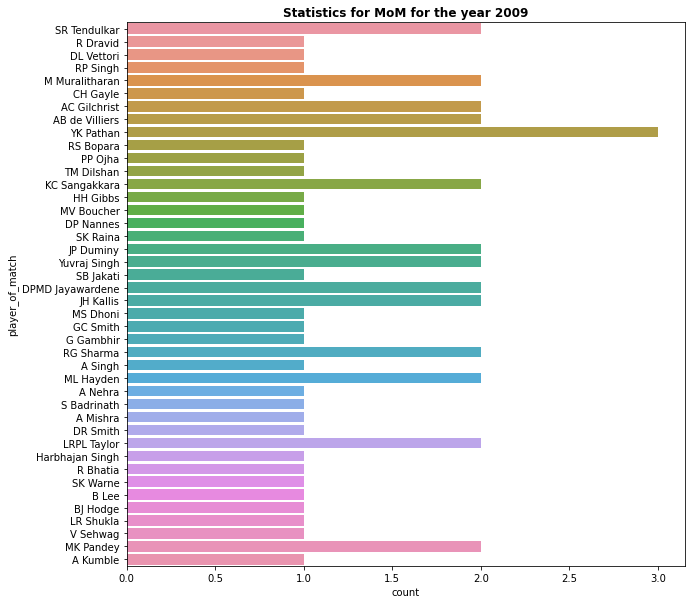

In [43]:
plt.figure(figsize = [10,10])
year = int(input("enter year"))
df = ipl.loc[ipl['season']==year]
sns.countplot(y = df['player_of_match'])
plt.title("Statistics for MoM for the year {}".format(year),fontweight='bold')
plt.show()


### conclusion : this shows that the number of times the player became a player of the match during a particular year mentioned 

# Total number of boundaries hit by top n batsman

enter total number of batsman10


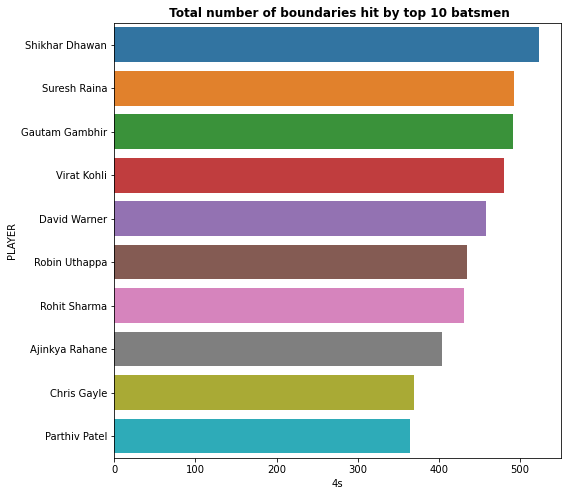

In [44]:
plt.figure(figsize=(8,8))
n = int(input("enter total number of batsman"))
if(n>75):
    print("there is only 75 players in the list")
    n=75
bats.sort_values("4s", axis = 0, ascending = False,inplace = True, na_position ='last') 
bats_4s = bats.iloc[0:n,:]
sns.barplot(x=bats_4s['4s'],y = bats_4s['PLAYER'])
plt.title(' Total number of boundaries hit by top {} batsmen'.format(n),fontweight='bold')
plt.show()


### conclusion : this depicts the number of times the top N players hit the boundaries 

# Total number of sixes hit by top n batsman

enter total number of batsman5


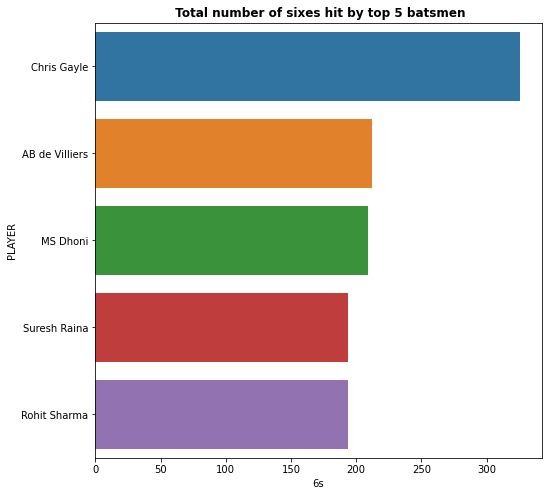

In [45]:
plt.figure(figsize=(8,8))
n = int(input("enter total number of batsman"))
if(n>75):
    print("there is only 75 players in the list")
    n=75
bats.sort_values("6s", axis = 0, ascending = False,inplace = True, na_position ='last') 
bats_6s = bats.iloc[0:n,:]
sns.barplot(x=bats_6s['6s'],y = bats_6s['PLAYER'])
plt.title(' Total number of sixes hit by top {} batsmen'.format(n),fontweight='bold')
plt.show()

# runs taken by the players of a specified teams

CSK


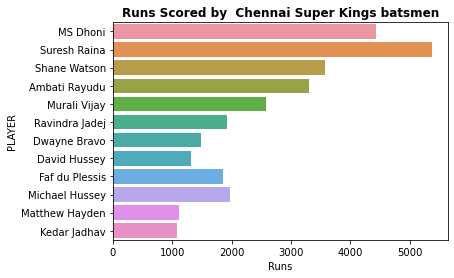

In [46]:
team1 = input()
team1 = team_name(team1)
top_batsman_perteam=bats.groupby('Team').get_group(team1)
sns.barplot(y=top_batsman_perteam['PLAYER'],x = top_batsman_perteam['Runs'] )
plt.title('Runs Scored by  {} batsmen'.format(team1),fontweight='bold')
plt.show()

### conclusion : this graph depicts the runs taken by a particular team given by the user.

# top best batsman of a team

CSK


<ipython-input-47-605eca48dd9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_batsman_perteam.sort_values("SR", axis = 0, ascending = False,inplace = True, na_position ='last')


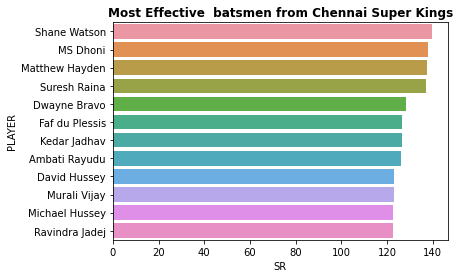

In [47]:
team = input()
team = team_name(team)
top_batsman_perteam=bats.groupby('Team').get_group(team)
top_batsman_perteam.sort_values("SR", axis = 0, ascending = False,inplace = True, na_position ='last') 
sns.barplot(y=top_batsman_perteam['PLAYER'],x = top_batsman_perteam['SR'])
plt.title('Most Effective  batsmen from {}'.format(team),fontweight='bold')
plt.show()

# players whoever had scored 100 and how many times

<ipython-input-48-373287e09fd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bats100.sort_values("100", axis = 0, ascending = False,inplace = True, na_position ='last')


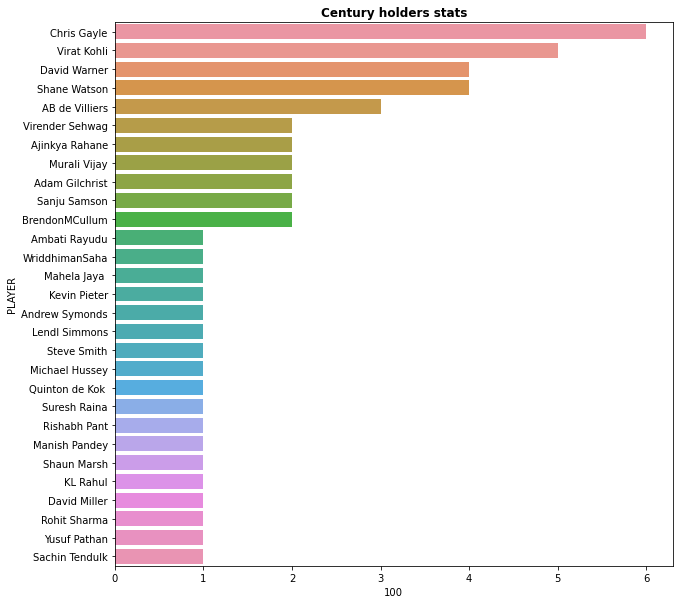

In [48]:
plt.figure(figsize=(10,10))
bats100 = bats.loc[bats['100']>=1]
bats100.sort_values("100", axis = 0, ascending = False,inplace = True, na_position ='last')
sns.barplot(y=bats100['PLAYER'],x = bats100['100'])
plt.title('Century holders stats',fontweight='bold')
plt.show()

### conclusion : this shows the information about the players who have scored hundread and also the number of times they have scored 100 throughout 

# teams which wins the match by how much runs

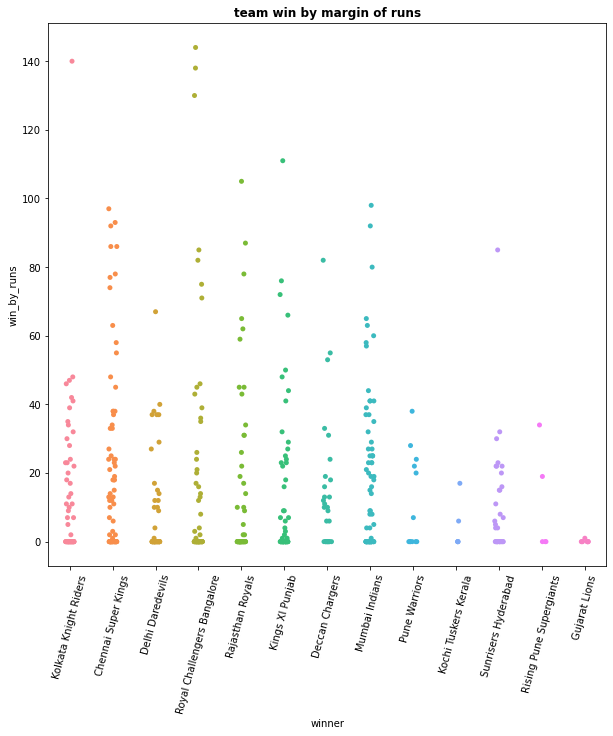

In [49]:
plt.figure(figsize = [10,10])
sns.stripplot(x = ipl['winner'],y = ipl['win_by_runs'],data = ipl)
plt.xticks(rotation = 75)
plt.title('team win by margin of runs',fontweight='bold' )
plt.show()

### conclusion : this graph depicts the different scenarios when different teams won by runs and how many runs did they win by

# teams which wins the match by how much wickets

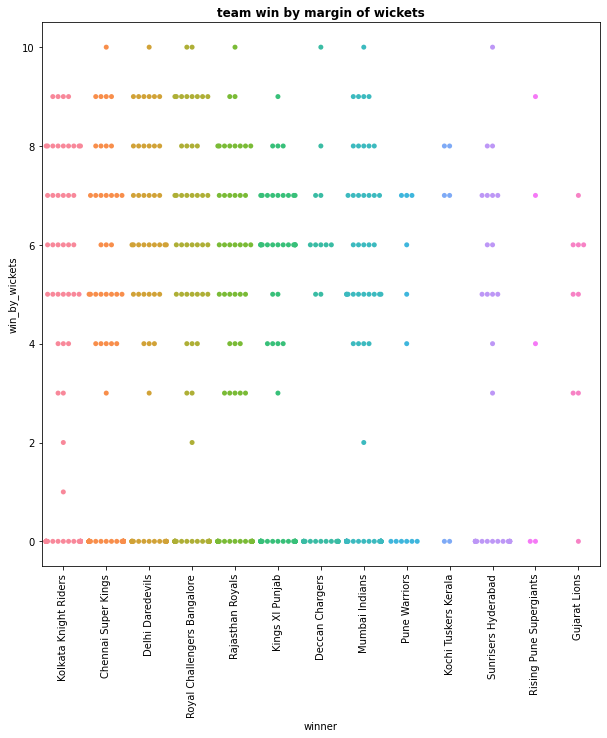

In [50]:
plt.figure(figsize = [10,10])
sns.swarmplot(x = ipl['winner'],y = ipl['win_by_wickets'],data = ipl)
plt.xticks(rotation = 90)
plt.title('team win by margin of wickets',fontweight='bold' )
plt.show()

### conclusion : this graph depicts the different scenarios when different teams won by runs and how many wickets did they win by

# teams which wins the match by how much runs on a range

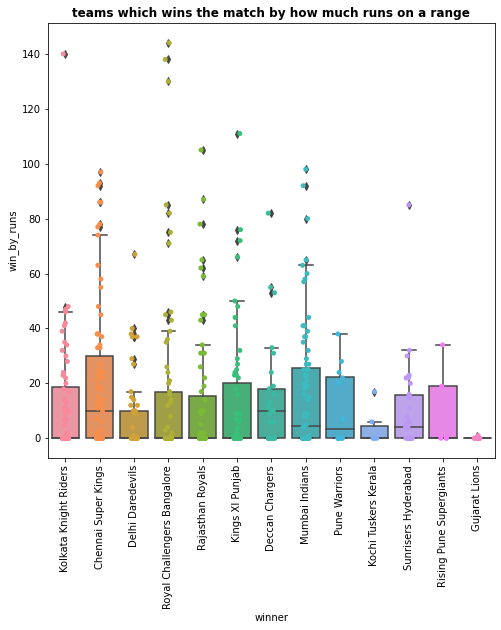

In [51]:
plt.figure(figsize = [8,8])
sns.boxplot(x = ipl['winner'],y = ipl['win_by_runs'],data = ipl)
sns.stripplot(x = ipl['winner'],y = ipl['win_by_runs'],data = ipl)
plt.xticks(rotation = 90)
plt.title('teams which wins the match by how much runs on a range',fontweight='bold')
plt.show()

### conclusion: this graph shows the scenaro where different teams won the matched by the runs they scored 


# teams which wins the match by how much wickets on a range

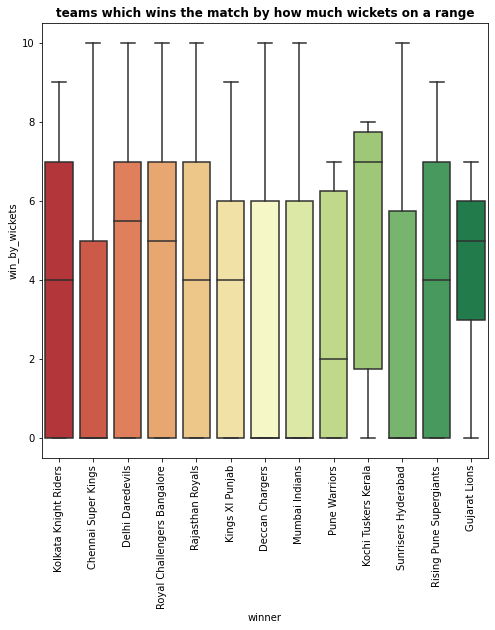

In [52]:
plt.figure(figsize = [8,8])
sns.boxplot(x = ipl['winner'],y = ipl['win_by_wickets'],data = ipl,palette='RdYlGn')
plt.xticks(rotation = 90)
plt.title('teams which wins the match by how much wickets on a range',fontweight='bold')
plt.show()

### conclusion: this graph shows the scenaro where different teams won the matched by the wickets they scored .KTK are the best chasers


# a particular team wins the other by how much runs on a range

enter team nameCSK


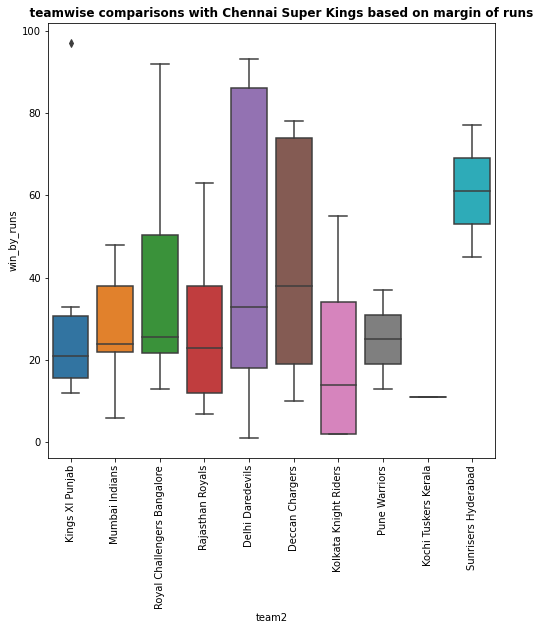

In [53]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"
plt.figure(figsize=(8,8))
team = input("enter team name")
team = team_name(team)
ds=ipl.groupby('winner').get_group(team)
sns.boxplot(x=ds[ds['team1']==team]['team2'],y=ds['win_by_runs']) 
plt.xticks(rotation = 90)
plt.title('     teamwise comparisons with {} based on margin of runs'.format(team),fontweight='bold')
plt.show()

### conclusion : this graph depicts the scenario where a particular team winning from a particular number of runs from the rest of the teams 

# a particular team wins the other by how much wickets on a range

enter team nameCSK


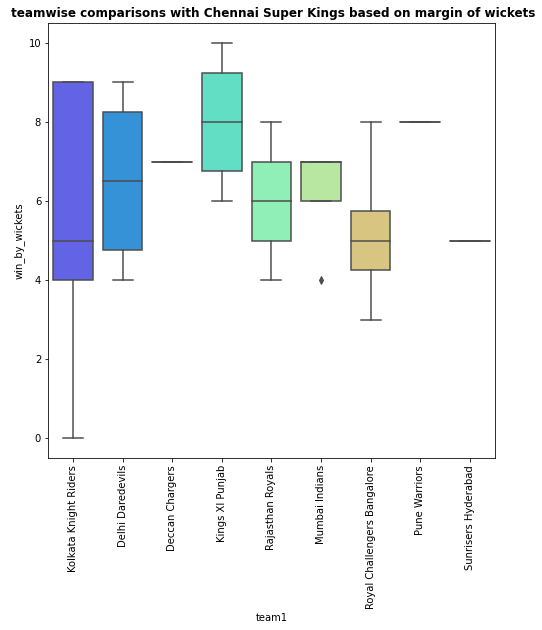

In [54]:
def team_name(name):
    if(name == 'MI'):
        return "Mumbai Indians"
    elif(name == 'DD'):
        return "Delhi Daredevils"
    elif(name == 'PW'):
        return "Pune Warriors"
    elif(name == 'GL'):
        return "Gujarat Lions"
    elif(name == 'RPS'):
        return "Rising Pune Supergiant"
    elif(name == 'RR'):
        return "Rajasthan Royals"
    elif(name == 'RCB'):
        return "Royal Challengers Bangalore"
    elif(name == 'CSK'):
        return "Chennai Super Kings"
    elif(name == 'KKR'):
        return "Kolkata Knight Riders"
    elif(name == 'KXIP'):
        return "Kings XI Punjab"
    elif(name == 'DC'):
        return "Deccan Chargers"

plt.figure(figsize=(8,8))  
team = input("enter team name")
team = team_name(team)
ds=ipl.groupby('winner').get_group(team)
sns.boxplot(x =ds[ds['team2']==team]['team1'],y=ds['win_by_wickets'],palette='rainbow')
plt.xticks(rotation = 90)
plt.title(' teamwise comparisons with {} based on margin of wickets'.format(team),fontweight='bold')
plt.show()

### conclusion : this graph depicts the scenario where a particular team winning from a particular number of wickets from the rest of the teams . CSK has won the best way , with KXIP

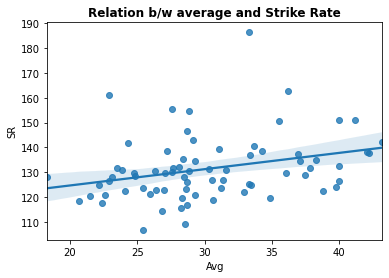

In [55]:
sns.regplot(x='Avg',y='SR',data=bats)
plt.title("Relation b/w average and Strike Rate",fontweight='bold')
plt.show()

### conclusion: the players tend to have greater average if they play with better strike rate

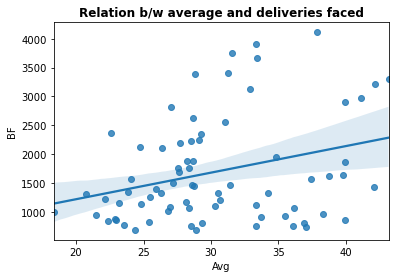

In [56]:
sns.regplot(x='Avg',y='BF',data=bats)
plt.title("Relation b/w average and deliveries faced",fontweight='bold')
plt.show()

### conclusion: the players who face more deliveries play better

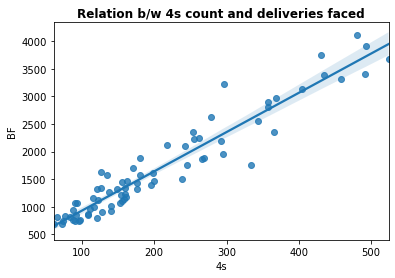

In [57]:
sns.regplot(x='4s',y='BF',data=bats)
plt.title("Relation b/w 4s count and deliveries faced",fontweight='bold')
plt.show()

### conclusion: the more deliveries you face , the more fours you can hit

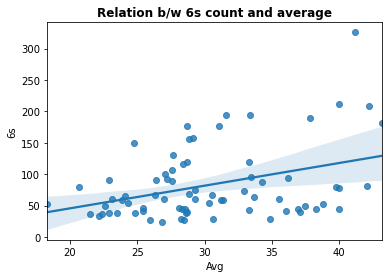

In [58]:
sns.regplot(x='Avg',y='6s',data=bats)
plt.title("Relation b/w 6s count and average",fontweight='bold')
plt.show()

### conclusion: Players who hit more sixes tend to have a better average 

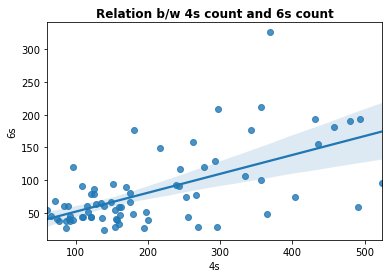

In [59]:
sns.regplot(x='4s',y='6s',data=bats)
plt.title("Relation b/w 4s count and 6s count",fontweight='bold')
plt.show()

### conclusion: Generally , a player hits more boundaries than sixes

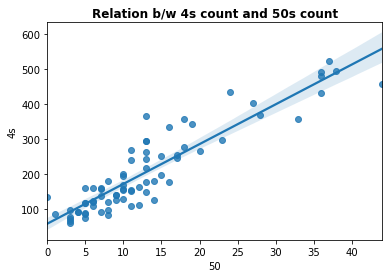

In [60]:
sns.regplot(x='50',y='4s',data=bats)
plt.title("Relation b/w 4s count and 50s count",fontweight='bold')
plt.show()

### conclusion: if a player hits many boundaries, he is more probable to score a half century

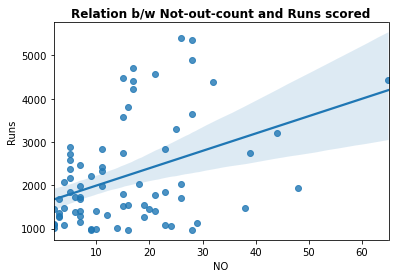

In [61]:
sns.regplot(x='NO',y='Runs',data=bats)
plt.title("Relation b/w Not-out-count and Runs scored",fontweight='bold')
plt.show()

### conclusion: the more no. of times a player is able to stay unbeaten , the more he is able to score overall